In [1]:
import sys
import os
import subprocess
import statistics
from PIL import Image
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

def set_param(imgfile,sigma,sigma_r,kappa,blocks_per_line):
    param_file = open('../parameters.txt',"w");
    print('image',imgfilename,file = param_file);
    print('sigma',sigma,file = param_file);
    print('sigmar',sigma_r,file = param_file);
    print('kappa',kappa,file = param_file);
    print('blocks_per_line',blocks_per_line,file = param_file);
    param_file.close();
    return



In [2]:
GPU_NAME = 'GTX_1050_Ti'

# Plotting functions

In [5]:
def generate_plot(input_filename):
    # We load the data and generate the plot
    data_dictionary = pickle.load(open(input_filename,'rb'))

    exectimeA = data_dictionary["exectimeA"]
    exectimeC3 = data_dictionary["exectimeC3"]
    exectimeC6 = data_dictionary["exectimeC6"]
    L_values = data_dictionary["L_values"]

    print("Loaded execution time data from {}".format(input_filename))

    avgA = []
    devA = []
    avgC3 = []
    devC3 = []
    avgC6 = []
    devC6 = []

    for i in range(len(exectimeA)):
        avgA.append(statistics.mean(exectimeA[i]))
        devA.append(statistics.stdev(exectimeA[i]))
        avgC3.append(statistics.mean(exectimeC3[i]))
        devC3.append(statistics.stdev(exectimeC3[i]))
        avgC6.append(statistics.mean(exectimeC6[i]))
        devC6.append(statistics.stdev(exectimeC6[i]))

    avgAframe = pd.DataFrame(list(zip(L_values,avgA)),columns = ['L','Algorithm A']);
    avgC3frame = pd.DataFrame(list(zip(L_values,avgC3)),columns = ['L','Algorithm C (3 blocks)']);
    avgC6frame = pd.DataFrame(list(zip(L_values,avgC6)),columns = ['L','Algorithm C (6 blocks)']);

    ##PLOT with 99 certainty interval
    ax = avgAframe.plot(x = avgAframe.columns.values[0], y = avgAframe.columns.values[1],style = '-.',marker = 'o', c ='b', ls='none');
    ax.set_ylabel('time (milliseconds)')
    avgC3frame.plot(ax=ax, x = avgC3frame.columns.values[0], y = avgC3frame.columns.values[1],style = '-.',marker = 'P', c = 'orange', ls='none')
    avgC6frame.plot(ax=ax, x = avgC6frame.columns.values[0], y = avgC6frame.columns.values[1],style = '-.',marker = 'v', c = 'g', ls='none')

    ax.xaxis.set_ticks(L_values)
    plt.xticks(fontsize=6)
    ax.errorbar(np.array(L_values), np.array(avgA), yerr=3*np.array(devA), ls='-',alpha = 0.5)
    ax.errorbar(np.array(L_values), np.array(avgC3), yerr=3*np.array(devC3), ls='-',alpha = 0.5)
    ax.errorbar(np.array(L_values), np.array(avgC6), yerr=3*np.array(devC6), ls='-',alpha = 0.5)

    # return the plot axis
    return ax

# Execution time: sigma,sigma_r = (50,50)¶


In [6]:
exectimeA = [];
exectimeC3 = [];
exectimeC6 = [];
nsamples = 10;

#Lrange = range(200,2000,100);
#L_values = list(Lrange);
L_values = [256*n for n in range(1,9)]

for i in L_values:
    #for each image
    samples = [];
    #run algorithm A
    for j in range(1,6):
        #SET PARAMETERS
        imgfilename = "temp.jpg";
        sigma = 50.00;
        sigma_r = 50.00;
        kappa = 2.00;
        blocks_per_line = 3.00;
        set_param(imgfilename,sigma,sigma_r,kappa,blocks_per_line);
        image_o = Image.open('../largeimages/image' + str(j) + '.jpg');
        tempimage = image_o.resize((i,i))
        tempimage.save('../images/temp.jpg')

        for k in range(nsamples):
            subprocess.run("../Algorithm_A/main > output.log",shell=True);
            file = open('output.log')
            #get exectime
            for line in file:
                fields = line.strip().split()
                samples.append(float(fields[1]));
            file.close()
    ##
    exectimeA.append(samples);
    
    samples = [];
    #run algorithm C 3blocks
    for j in range(1,6):
        #SET PARAMETERS
        imgfilename = "temp.jpg";
        sigma = 50.00;
        sigma_r = 50.00;
        kappa = 2.00;
        blocks_per_line = 3.00;
        set_param(imgfilename,sigma,sigma_r,kappa,blocks_per_line);
        image_o = Image.open('../largeimages/image' + str(j) + '.jpg');
        tempimage = image_o.resize((i,i))
        tempimage.save('../images/temp.jpg')

        for k in range(nsamples):
            subprocess.run("../Algorithm_C/main > output.log",shell=True);
            file = open('output.log')
            #get exectime
            for line in file:
                fields = line.strip().split()
                samples.append(float(fields[1]));
            file.close()
    ##
    exectimeC3.append(samples);
    
    samples = [];
    #run algorithm C 6blocks
    for j in range(1,6):
        #SET PARAMETERS
        imgfilename = "temp.jpg";
        sigma = 50.00;
        sigma_r = 50.00;
        kappa = 2.00;
        blocks_per_line = 6.00;
        set_param(imgfilename,sigma,sigma_r,kappa,blocks_per_line);
        image_o = Image.open('../largeimages/image' + str(j) + '.jpg');
        tempimage = image_o.resize((i,i))
        tempimage.save('../images/temp.jpg')

        for k in range(nsamples):
            subprocess.run("../Algorithm_C/main > output.log",shell=True);
            file = open('output.log')
            #get exectime
            for line in file:
                fields = line.strip().split()
                samples.append(float(fields[1]));
            file.close()
    ##
    exectimeC6.append(samples);
    
# Instead of computing the plot, we just save the data to a
# binary file, which we open later for generating the plot.
data_dictionary = {
    "exectimeA": exectimeA,
    "exectimeC3": exectimeC3,
    "exectimeC6": exectimeC6,
    "L_values": L_values
}
output_filename = "../measures/{}_exectime1_50_50.pkl".format(GPU_NAME)
pickle.dump(data_dictionary, open(output_filename, 'wb'))
print("Saved execution time data to {}".format(output_filename))

Saved execution time data to ../measures/GTX_1050_Ti_exectime1_50_50.pkl


Loaded execution time data from ../measures/GTX_1050_Ti_exectime1_50_50.pkl


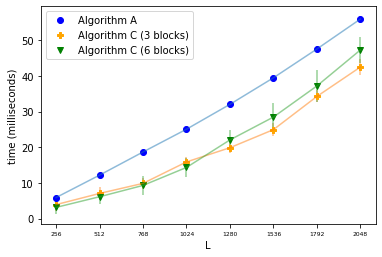

In [8]:
# We now load the data and generate the plot
ax = generate_plot("../measures/GTX_1050_Ti_exectime1_50_50.pkl")
ax.figure.savefig('../measures/RTX_1050_Ti_exectime1_50_50.pdf')


# Execution time: (200,150)


In [9]:
exectimeA = [];
exectimeC3 = [];
exectimeC6 = [];
nsamples = 10;

#Lrange = range(200,2000,100);
#L_values = list(Lrange);
L_values = [256*n for n in range(1,9)]

for i in L_values:
    #for each image
    samples = [];
    #run algorithm A
    for j in range(1,6):
        #SET PARAMETERS
        imgfilename = "temp.jpg";
        sigma = 200.00;
        sigma_r = 150.00;
        kappa = 2.00;
        blocks_per_line = 3.00;
        set_param(imgfilename,sigma,sigma_r,kappa,blocks_per_line);
        image_o = Image.open('../largeimages/image' + str(j) + '.jpg');
        tempimage = image_o.resize((i,i))
        tempimage.save('../images/temp.jpg')

        for k in range(nsamples):
            subprocess.run("../Algorithm_A/main > output.log",shell=True);
            file = open('output.log')
            #get exectime
            for line in file:
                fields = line.strip().split()
                samples.append(float(fields[1]));
            file.close()
    ##
    exectimeA.append(samples);
    
    samples = [];
    #run algorithm C 3blocks
    for j in range(1,6):
        #SET PARAMETERS
        imgfilename = "temp.jpg";
        sigma = 200.00;
        sigma_r = 150.00;
        kappa = 2.00;
        blocks_per_line = 3.00;
        set_param(imgfilename,sigma,sigma_r,kappa,blocks_per_line);
        image_o = Image.open('../largeimages/image' + str(j) + '.jpg');
        tempimage = image_o.resize((i,i))
        tempimage.save('../images/temp.jpg')

        for k in range(nsamples):
            subprocess.run("../Algorithm_C/main > output.log",shell=True);
            file = open('output.log')
            #get exectime
            for line in file:
                fields = line.strip().split()
                samples.append(float(fields[1]));
            file.close()
    ##
    exectimeC3.append(samples);
    
    samples = [];
    #run algorithm C 6blocks
    for j in range(1,6):
        #SET PARAMETERS
        imgfilename = "temp.jpg";
        sigma = 200.00;
        sigma_r = 15.00;
        kappa = 2.00;
        blocks_per_line = 6.00;
        set_param(imgfilename,sigma,sigma_r,kappa,blocks_per_line);
        image_o = Image.open('../largeimages/image' + str(j) + '.jpg');
        tempimage = image_o.resize((i,i))
        tempimage.save('../images/temp.jpg')

        for k in range(nsamples):
            subprocess.run("../Algorithm_C/main > output.log",shell=True);
            file = open('output.log')
            #get exectime
            for line in file:
                fields = line.strip().split()
                samples.append(float(fields[1]));
            file.close()
    ##
    exectimeC6.append(samples);
    
# Instead of computing the plot, we just save the data to a
# binary file, which we open later for generating the plot.
data_dictionary = {
    "exectimeA": exectimeA,
    "exectimeC3": exectimeC3,
    "exectimeC6": exectimeC6,
    "L_values": L_values
}
output_filename = "../measures/{}_exectime1_200_150.pkl".format(GPU_NAME)
pickle.dump(data_dictionary, open(output_filename, 'wb'))
print("Saved execution time data to {}".format(output_filename))

Saved execution time data to ../measures/GTX_1050_Ti_exectime1_200_150.pkl


Loaded execution time data from ../measures/GTX_1050_Ti_exectime1_200_150.pkl


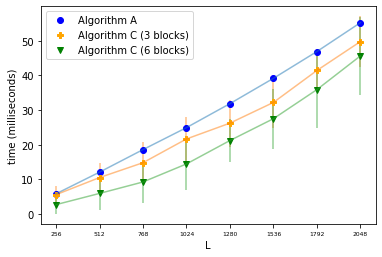

In [10]:
# We now load the data and generate the plot
ax = generate_plot("../measures/GTX_1050_Ti_exectime1_200_150.pkl")
ax.figure.savefig('../measures/GTX_1050_Ti_exectime1_200_150.pdf')

